# GSM

- 900MHz range composed of channels 0-124 with 200kHz spacing<br>
- modulation: 0.3GMSK (Gaussian minimum shift keying (frequency modulation)<br>
- frequency difference (for MSK): $\Delta f = 1/(2 \Delta t) = 135.416kHz $ ($\pm 67.708kHz$ around center frequency)<br>
- bitrate: 270.833kbit/s<br>

### Resources
http://www.cs.ru.nl/~fabianbr/pub/scriptie.pdf<br>

### frequencies

E-GSM-900:-----up:880.0–915.0-------down:925.0–960.0------ch:0-124<br>
R-GSM-900:-----up:876.0–915.0-------down:921.0–960.0------ch:0-124<br>
DCS-1800:------up:1710.2–1784.8-----down:1805.2–1879.8-----ch:512-885<br>

### GSMK Modulation
from: Digital cellular telecommunications system (Phase 2+);Modulation(GSM 05.04 version 8.1.2 Release 1999) [ETSI EN 300 959]

differential encoding of two bits at a time:
\begin{align}
\hat{d}_i = (d_{i-1}+d_{i}) \mod 2
\end{align}

modulation data:
\begin{align}
\alpha_i = 1 - 2\hat{d}_i \in \{-1,1\}
\end{align}

impulse response of filter:
\begin{align}
g(t) = rect\Big(\frac{t}{T}\Big) \circledast \frac{\exp\Big(\frac{-t^2}{2\delta^2T^2}\Big)}{\sqrt{2 \pi} \cdot \delta T}
\end{align}
with $\delta = \frac{\sqrt{\ln(2)}}{2\pi B T}$, where B is the 3dB bandwidth and T the time duration of one bit (for 0.3GMSK $BT=0.3$)

output phase:
\begin{align}
\phi(t) = \int_{t_0}^{t} \underbrace{\sum_i \alpha_i}_{\text{signal}} \cdot \frac{\pi}{2} \cdot \underbrace{g(u)}_{\text{impulse response}} du
\end{align}
where the current index i of $\alpha_i$ is dependent on time.<br>
This results in a phase shift of $\alpha \cdot \pi/2$ in the the output.

modulation:
\begin{align}
x(t) = \sqrt{\frac{2 E}{T}}\cos(2\pi f_0 t + \phi(t) + \phi_0)
\end{align}

### demodulation

From the bit encoding follows $\hat{d}_i = 1$ for $d_{i-1} = d_{i}$, else $\hat{d}_i = 0$ for $d_{i-1} \neq d_{i}$. This is a differential encoding and since the first bits of a message are known all other bits can be determined by measuring if the phase change was positive or negative.<br>

Because frequency is the time derivative of phase, in this modulation the frequency is varied with $\alpha_i g(t) = \pm g(t)$ around the carrier frequency with an overal phase change of $\pm \pi/2$ for every transmitted $\hat{d}_i$.<br>

### burst
from: Digital cellular telecommunications system (Phase 2+);Multiplexing and multiple access on the radio path(GSM 05.02)

Within a channel data is send in TDMA frames. A TDMA frame contains 8 burst wich are assigned to different mobile phones (time multiplexing).<br>
Uplink lags by 3 time slots (bursts) to the downlink and they are seperated by exactly 45mhz.<br>

<img src="gsm_burst.png" style="width:500px">

defined sequences:
- guard: poer ramp up => bits undefined
- tail (0,0,0)
- synchronisation burst - extended training bits (1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1)
- access burst - extended tail bits (0,0,1,1,1,0,1,0)
- access burst - synchronisation sequence (0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0)
- dummy burst - mixed bits (1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0)


possible training sequences:
- (0,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,1)
- (0,0,1,0,1,1,0,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,1)
- (0,1,0,0,0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0)
- (0,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0)
- (0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1)
- (0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,1,0)
- (1,0,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1)
- (1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,1,0,0)



### data hirarchy

- 1 burst (576.9us)
- 8 bursts = TDMA frame (4.615ms)
- 26 TDMAs = traffic multiframe (120ms)
- 51 traffic multiframes = traffic superframe (6.12s)
- 51 TDMAs = control multiframe (235.4ms)
- 26 control multiframes = control superframe (6.12s)
- 2048 superframes = hyperframe (12533.76s)


### channels

<b style="font-size:15px">cch control channels (call setup, power adjustment)</b><br>
<b style="font-size:15px">tch traffic channels (voice, data)</b><br>

### identification

telefon number ---> imsi (nr obfuscation) ---> tmsi (temporary,to avoid tracking)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter1d as gaussian
from scipy.signal import decimate,convolve
from rtlsdr import RtlSdr
from time import sleep

global pi,i
pi =np.pi
i = np.complex(0,1)

In [19]:
# configure device & capture data
freq = 933.6e+6
sample_rate = 2280000
bandwidth = 200e+3
nr_samples = 2**18
time_interval = nr_samples/sample_rate

sdr = RtlSdr()
sleep(1)
sdr.sample_rate = sample_rate
sdr.center_freq = freq
sdr.bandwidth = bandwidth
sdr.freq_correction = 60 #PPM
sdr.gain = 'auto'
samples = sdr.read_samples(nr_samples)
sdr.close()

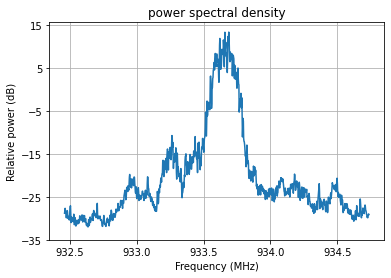

In [20]:
# power spectral density (sum of windowed fft)
from pylab import psd
psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
plt.title('power spectral density')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative power (dB)')
plt.show()

Text(0, 0.5, 'amplitude')

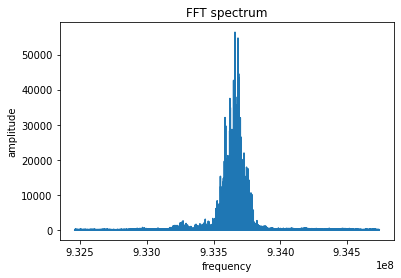

In [21]:
### simple fft spectrum
fig = plt.figure()
spectrum = np.fft.fftshift(np.fft.fft(samples))
frequencies = (np.arange(-nr_samples/2,nr_samples/2,1))*1/time_interval
plt.plot(freq + frequencies,abs(spectrum))
plt.title('FFT spectrum')
plt.xlabel('frequency')
plt.ylabel('amplitude')

In [22]:
#gsm burst and capture parameters
burst_time = 576.9e-6 #burst time
burst_symbols = 156.25 #bits per burst
bps = burst_symbols/burst_time #bits per second
sample_per_burst = sample_rate*burst_time
sample_per_bit = sample_per_burst/burst_symbols
print('bits per second: ',bps)
print('time per bit: ',1/bps)
print('samples captured per burst:',sample_per_burst)
print('samples per bit:',sample_per_bit)

bits per second:  270844.16710001737
time per bit:  3.6921599999999997e-06
samples captured per burst: 1315.3319999999999
samples per bit: 8.4181248


In [30]:
#plot start (start of burst in current captured samples)
c = 3970

Text(0, 0.5, 'amplitude')

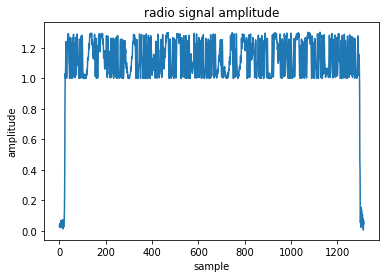

In [31]:
plt.plot(np.abs(samples[c:int(sample_per_burst)+c]))
plt.title('radio signal amplitude')
plt.xlabel('sample')
plt.ylabel('amplitude')

Text(0, 0.5, 'phase')

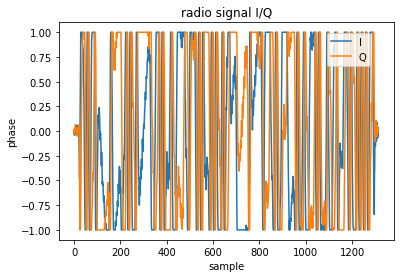

In [32]:
s = np.arange(int(sample_per_burst))
plt.plot(s,np.real(samples[c:int(sample_per_burst)+c]),label='I')
plt.plot(s,np.imag(samples[c:int(sample_per_burst)+c]),label='Q')
plt.legend(loc=(0.8,0.8))
plt.title('radio signal I/Q')
plt.xlabel('sample')
plt.ylabel('phase')

Text(0, 0.5, 'phase')

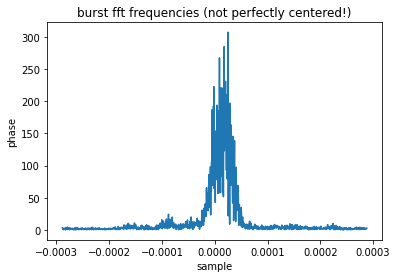

In [33]:
plt.plot(np.arange(-burst_time/2,burst_time/2,burst_time/int(sample_per_burst)),np.abs(np.fft.fftshift(np.fft.fft(samples[c:int(sample_per_burst)+c]))))
plt.title('burst fft frequencies (not perfectly centered!)')
plt.xlabel('sample')
plt.ylabel('phase')

Text(0.5, 0, 'Q')

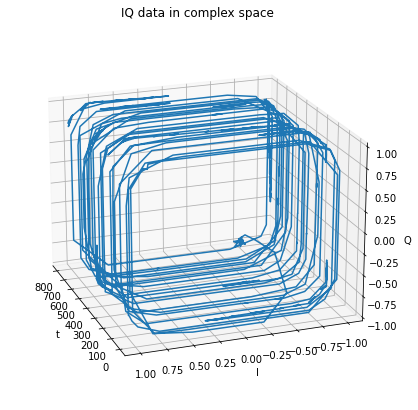

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(111, projection='3d')
a = 800
ax.plot(np.arange(a),np.real(samples[c:c+a]),np.imag(samples[c:c+a]))
ax.view_init(20, 160)
plt.title('IQ data in complex space')
ax.set_xlabel('t')
ax.set_ylabel('I')
ax.set_zlabel('Q')

Text(0, 0.5, 'phase')

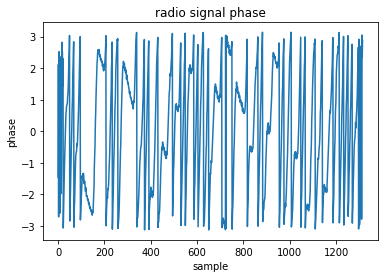

In [35]:
plt.plot(np.angle(samples[c:int(sample_per_burst)+c]))
plt.title('radio signal phase')
plt.xlabel('sample')
plt.ylabel('phase')

Text(0, 0.5, 'phase')

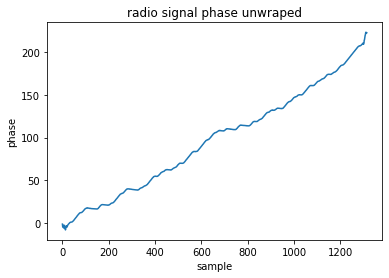

In [36]:
plt.plot(np.unwrap(np.angle(samples[c:int(sample_per_burst)+c])))
plt.title('radio signal phase unwraped')
plt.xlabel('sample')
plt.ylabel('phase')

Text(0, 0.5, 'phase change')

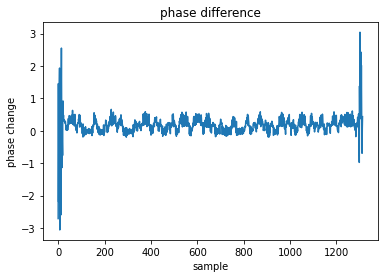

In [37]:
signal1 = np.diff(np.unwrap(np.angle(samples[c:int(sample_per_burst)+c])))
plt.plot(signal1)
plt.title('phase difference')
plt.xlabel('sample')
plt.ylabel('phase change')

## simulate gsm signal

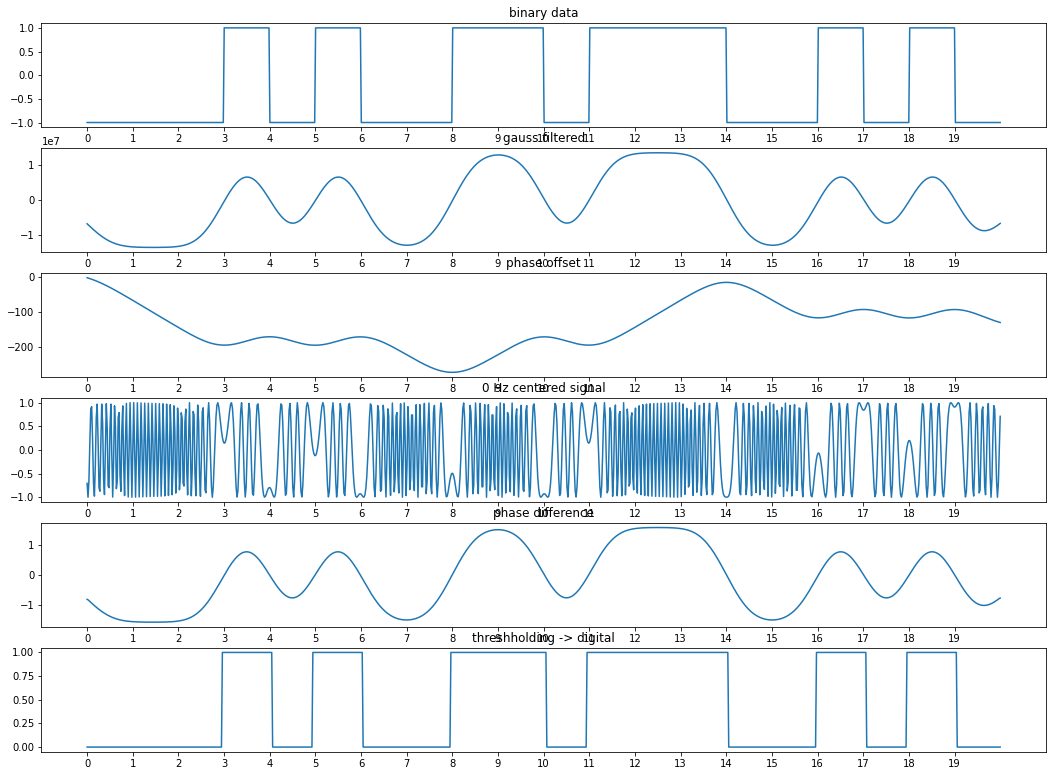

In [65]:
#simulation
#note: due to the high carrier frequency the signal wouldn't be observable, hence the
#carrier frequency is shifted to 0Hz. For this reason this simulation is displaying
#possible observed data by the sdr rather than the original data
#(without possible phase and frequency offsets introduced by timing and frequency errors)

abs2 = lambda x: np.square(np.real(x)) + np.square(np.imag(x))
phase_diff = lambda x: np.gradient(np.imag(x))*np.real(x) - np.real(np.real(x))*np.imag(x)
#phase_diff = lambda x: np.gradient(np.unwrap(np.angle(x)))

#gsm specs
T = 1/bps #time per symbol
BT=0.3
delta = np.sqrt(np.log(2))/(2*pi*BT)

#data parameters
N= 20 #data symbols
time_interval = T*N #overall time
n = 1000 #data samples
numN = n/N #samples per symbol
t = np.arange(0,time_interval,time_interval/(n-1))

data = np.ones(n)
d = np.round(np.random.rand(N))
for ii in range(N):
    if d[ii]==1:
        data[int(ii*numN):int((ii+1)*numN)] = -1

gauss = np.exp(-(t-time_interval/2)**2/(2*delta**2*T**2))/(np.sqrt(2*pi)*delta*T)
filtered = convolve(data,gauss,mode='same')
summed = np.zeros(n)
summed[0] = filtered[0]*time_interval/n
for k in range(1,n):
    summed[k] = summed[k-1] + filtered[k]*time_interval/n
phase = summed*pi/2
waveform = np.sin(phase)
gradient = np.gradient(phase)
digital = (gradient-np.sum(gradient)/np.size(gradient))>0

fig = plt.figure(figsize=(18,18))

ax1 = plt.subplot(8,1,1)
plt.title('binary data')
plt.plot(t,data)
ax1.set_xticks(np.arange(0,time_interval,time_interval/N))
ax1.set_xticklabels(np.arange(0,N))

ax2= plt.subplot(8,1,2)
plt.title('gauss filtered')
plt.plot(t,filtered)
ax2.set_xticks(np.arange(0,time_interval,time_interval/N))
ax2.set_xticklabels(np.arange(0,N))

ax3 = plt.subplot(8,1,3)
plt.title('phase offset')
plt.plot(t,phase)
ax3.set_xticks(np.arange(0,time_interval,time_interval/N))
ax3.set_xticklabels(np.arange(0,N))

ax4 = plt.subplot(8,1,4)
plt.title('0 Hz centered signal')
plt.plot(t,waveform)
ax4.set_xticks(np.arange(0,time_interval,time_interval/N))
ax4.set_xticklabels(np.arange(0,N))

ax5 = plt.subplot(8,1,5)
plt.title('phase difference')
plt.plot(t,gradient)
ax5.set_xticks(np.arange(0,time_interval,time_interval/N))
ax5.set_xticklabels(np.arange(0,N))

ax6 = plt.subplot(8,1,6)
plt.title('threshholding -> digital')
plt.plot(t,digital)
ax6.set_xticks(np.arange(0,time_interval,time_interval/N))
ax6.set_xticklabels(np.arange(0,N))

plt.show()